# Understanding Gene Relationships through Various Network Visualization Approaches

In [26]:
import pandas as pd

In [27]:
from statistics import *

In [28]:
import netrd as net

In [29]:
from scipy import stats

In [30]:
import random

In [31]:
# viz:
import seaborn as sns
import matplotlib.pyplot as plt

## Achilles Data
Source: [DepMap](https://depmap.org/portal/achilles/)

Download portal: [Achilles](https://depmap.org/portal/download/all/)

### Gene Effect (NNMD - Null-Normalized Mean Difference)

In [44]:
gene_effect = pd.read_csv('Achilles_gene_effect.csv')

In [45]:
gene_effect=gene_effect.set_index('Unnamed: 0');

In [46]:
gene_effect=gene_effect.rename(index={'Unnamed: 0':'cell_line'})

In [47]:
gene_effect.shape

(625, 18333)

In [48]:
genes = gene_effect.columns

In [49]:
gene_sample_list = random.sample(list(genes), 30)
gene_sample_list

['RUBCN (9711)',
 'COLCA2 (120376)',
 'C17orf47 (284083)',
 'SLC9C1 (285335)',
 'LRIG3 (121227)',
 'MS4A15 (219995)',
 'DSN1 (79980)',
 'PRAMEF2 (65122)',
 'ADAM15 (8751)',
 'CHEK1 (1111)',
 'RAD18 (56852)',
 'GRM1 (2911)',
 'RRAGB (10325)',
 'RSPH4A (345895)',
 'BMP3 (651)',
 'VEZF1 (7716)',
 'TDRD3 (81550)',
 'TAS2R40 (259286)',
 'LDLRAD1 (388633)',
 'LOX (4015)',
 'GIMAP2 (26157)',
 'PEX26 (55670)',
 'CTSW (1521)',
 'NECAB2 (54550)',
 'TBC1D12 (23232)',
 'SLC24A3 (57419)',
 'LMNTD2 (256329)',
 'RAB34 (83871)',
 'TCF21 (6943)',
 'HAUS2 (55142)']

RRAGB (10325)


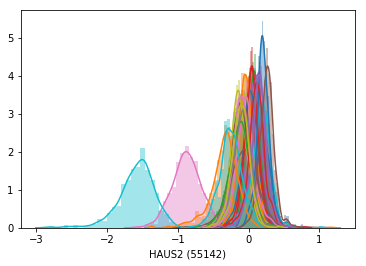

In [50]:
for g in gene_sample_list:
    try:sns.distplot(gene_effect[g])
    except:print(g)

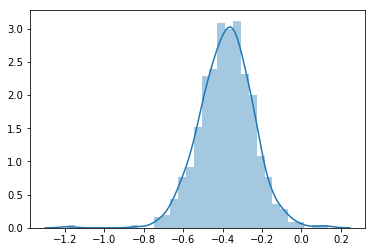

In [51]:
g = random.sample(list(genes), 1)
sns.distplot(gene_effect[g])

In [52]:
dt=pd.DataFrame(gene_effect.dtypes)
dt.head(5)

,0
A1BG (1),float64
A1CF (29974),float64
A2M (2),float64
A2ML1 (144568),float64
A3GALT2 (127550),float64


In [53]:
stats.describe(gene_effect[g])

DescribeResult(nobs=625, minmax=(array([-1.1861904]), array([0.13285718])), mean=array([-0.38166718]), variance=array([0.01840075]), skewness=array([-0.26860701]), kurtosis=array([2.0678619]))

### DepMap Cell Line Metadata

In [55]:
cell_lines = pd.read_csv('DepMap-2019q1-celllines_v2.csv')

In [56]:
cell_lines.head(5)

,DepMap_ID,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
0,ACH-000001,NIHOVCAR3_OVARY,NIH:OVCAR-3;OVCAR3,905933.0,2201.0,Ovarian Cancer,"Adenocarcinoma, high grade serous",Female,ATCC
1,ACH-000002,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HL-60,905938.0,55.0,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",Female,ATCC
2,ACH-000003,CACO2_LARGE_INTESTINE,CACO2;CACO2;CaCo-2,NaN,NaN,Colon/Colorectal Cancer,Colon Adenocarcinoma,-1,NaN
3,ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL,907053.0,783.0,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,DSMZ
4,ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL 92.1.7,NaN,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,ATCC


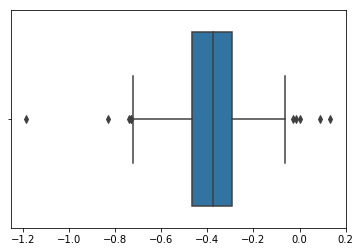

In [69]:
sns.boxplot(gene_effect[g].reset_index()[g])

In [71]:
lines_in_ge = list(gene_effect.index)

In [77]:
# Filter cell lines metadata to only cell lines in the gene effect dataset
filtered_cell_lines = cell_lines[cell_lines['DepMap_ID'].isin(list(gene_effect.index))]

In [78]:
filtered_cell_lines.to_csv('data/filtered_cell_lines_metadata.csv')

In [84]:
filtered_cell_lines.columns

Index(['DepMap_ID', 'CCLE_Name', 'Aliases', 'COSMIC_ID', 'Sanger ID',
       'Primary Disease', 'Subtype Disease', 'Gender', 'Source'],
      dtype='object')